# QUESTION 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="/home/AIML_Student/Desktop/2030B/week7/week7_data.csv"
data=pd.read_csv(path)
data.head()

,x1,x2,y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0


In [3]:
x1=np.array(data.iloc[:,:-2])
x2=np.array(data.iloc[:,-2:-1])
y=np.array(data.iloc[:,-1])
b0,b1,b2=0,0,0
alpha=0.3
n=data.shape[0]
epochs=50

In [4]:
accuracy,b0s,b1s,b2s,errors = [],[],[],[],[]
for ep in range (epochs):
    correct=0
    for i in range (n):
        op = b0 + b1*x1[i] + b2*x2[i]
        #b. Apply the sigmoid function to get the prediction and calculate error.
        pred = 1/(1+np.exp(-op))
        err=y[i]-pred
        #a. Calculate the coefficients (B0, B1 and B2).
        b0 = b0 + alpha * (err) * pred * (1 - pred)
        b1 = b1 + alpha * (err) * pred * (1 - pred) * x1[i]
        b2 = b2 + alpha * (y - pred) * pred * (1 - pred) * x2[i]
        b0,b1,b2 = b0[0],b1[0],b2[0]
        if (((pred < 0.5) & (y[i] == 0)) | ((pred >= 0.5) & (y[i] == 1))).all():
            correct += 1
    #c. From the predicted values calculate the accuracy.
    accuracy.append(correct/n) 
    b0s.append(b0)
    b1s.append(b1)
    b2s.append(b2)
    errors.append(err)
    #d. List the model parameters along with error for every instance of the training data.
    if (ep+1)%5 == 0:
        print("After epoch",ep+1,": b0 =",b0,"b1 =",b1,"b2 =",b2," Error = ",err)       

After epoch 5 : b0 = 0.0017030064841242632 b1 = 1.1987054623704312 b2 = -2.215551234608062  Error =  [0.24046307]
After epoch 10 : b0 = 0.0716075909243749 b1 = 1.736521149473661 b2 = -3.399475036392157  Error =  [0.20840815]
After epoch 15 : b0 = 0.1313363663971927 b1 = 2.174587590493502 b2 = -4.3705524066001455  Error =  [0.20181008]
After epoch 20 : b0 = 0.18429221117416514 b1 = 2.568637245771053 b2 = -5.244057059680439  Error =  [0.19685876]
After epoch 25 : b0 = 0.23282536585286068 b1 = 2.9341266994342594 b2 = -6.053779576170079  Error =  [0.19227018]
After epoch 30 : b0 = 0.27830549601442633 b1 = 3.279177468403905 b2 = -6.8181042366806865  Error =  [0.18824382]
After epoch 35 : b0 = 0.3215931759704618 b1 = 3.6090625732180377 b2 = -7.548963646199516  Error =  [0.18484777]
After epoch 40 : b0 = 0.36326236050078364 b1 = 3.9274669677999063 b2 = -8.254639601429542  Error =  [0.18204574]
After epoch 45 : b0 = 0.40371331123328347 b1 = 4.237065977293586 b2 = -8.941099046839426  Error =  [

e. Plot the graph of B1 v/s error and B2 v/s error.

([<matplotlib.lines.Line2D at 0x7f9ec74ad4e0>], Text(0.5, 1.0, 'B2 vs Error'))

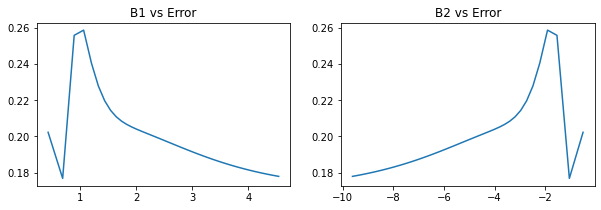

In [5]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.plot(b1s,errors),plt.title("B1 vs Error")
plt.subplot(1,2,2)
plt.plot(b2s,errors),plt.title("B2 vs Error")

f. Use scikit learn model to repeat the above steps and compare the results.

In [6]:
from sklearn.linear_model import LogisticRegression
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.coef_,clf.intercept_)

[[ 1.18383416 -0.35803503]] [-4.55163352]
